Load libraries

In [ ]:
#imports
from __future__ import print_function
import pyart
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import numpy as np
import h5py
from time import time
import os
from netCDF4 import num2date, date2num
from mpl_toolkits.basemap import Basemap


Load odimh5 file

In [112]:
def plot_panel(in_fn,out_fn):

    #Since the names in the HDF5 file are non-standard we use file_field_names = True
    radar = pyart.aux_io.read_odim_h5(in_fn, file_field_names=True) 

    radar.fields['DBZH']['standard_name'] = 'Reflectivity'
    radar.fields['DBZH']['units'] = 'dBZ'
    radar.fields['DBZH']['long_name'] = 'Radar Reflectivity Factor'
    radar.fields['VRADH']['standard_name'] = 'Velocity'
    radar.fields['VRADH']['units'] = 'm/s'
    radar.fields['VRADH']['long_name'] = 'Radial Velocity of Scatterers'

    hfile = h5py.File(in_fn, 'r')
    d1_how = hfile['dataset1']['how'].attrs
    NI = d1_how['NI']

    gatefilter = pyart.correct.GateFilter(radar)
    gatefilter.exclude_below('DBZH',15)
    
    corr_vel = pyart.correct.dealias_region_based(
        radar, vel_field='VRADH', keep_original=False, nyquist_vel=NI)
    radar.add_field('corrected_velocity', corr_vel, True)
    
    radar.fields['corrected_velocity']['standard_name'] = 'Velocity'
    radar.fields['corrected_velocity']['units'] = 'm/s'
    radar.fields['corrected_velocity']['long_name'] = 'Radial Velocity of Scatterers'
    
    
    lat_lines = np.arange(-33,-35,-.5)
    lon_lines = np.arange(137, 140, .5)
    
    tilt = 0
    max_lat   = -32.7
    min_lat   = -34.4
    min_lon   = 137.4
    max_lon   = 139.6
    
    f = plt.figure(figsize=[15,7])
    
    plt.subplot(1,2,1)
    display = pyart.graph.RadarMapDisplay(radar)
    display.plot_ppi_map('DBZH', tilt, vmin=15, vmax=65, 
                        lat_lines = lat_lines, lon_lines = lon_lines,
                        max_lat = max_lat, min_lat =min_lat, min_lon = min_lon, max_lon = max_lon,
                        cmap = pyart.graph.cm.NWSRef,gatefilter=gatefilter)
    display.plot_point( 138.486604, -33.847953,label_text='Blyth',  label_offset=[.03,.03],symbol='wo',markersize=10) 
    display.plot_point( 138.183333, -32.816666,label_text='Melrose',label_offset=[.03,.03],symbol='wo',markersize=10)
    
    plt.subplot(1,2,2)
    display = pyart.graph.RadarMapDisplay(radar)
    display.plot_ppi_map('corrected_velocity', tilt, vmin=-40, vmax=40, 
                        lat_lines = lat_lines, lon_lines = lon_lines,
                        max_lat = max_lat, min_lat =min_lat, min_lon = min_lon, max_lon = max_lon,
                        cmap = pyart.graph.cm.BuDRd12)
    display.plot_point( 138.486604, -33.847953,label_text='Blyth',  label_offset=[.03,.03],symbol='wo',markersize=10) 
    display.plot_point( 138.183333, -32.816666,label_text='Melrose',label_offset=[.03,.03],symbol='wo',markersize=10)
    
    plt.savefig(out_fn, dpi=100)

processing  /run/media/meso/DATA/project_data/sa_tor/64_20160928_040102.h5
processing  /run/media/meso/DATA/project_data/sa_tor/64_20160928_041104.h5
processing  /run/media/meso/DATA/project_data/sa_tor/64_20160928_042102.h5
processing  /run/media/meso/DATA/project_data/sa_tor/64_20160928_043103.h5
processing  /run/media/meso/DATA/project_data/sa_tor/64_20160928_044102.h5
processing  /run/media/meso/DATA/project_data/sa_tor/64_20160928_045102.h5
processing  /run/media/meso/DATA/project_data/sa_tor/64_20160928_050103.h5
processing  /run/media/meso/DATA/project_data/sa_tor/64_20160928_051104.h5
processing  /run/media/meso/DATA/project_data/sa_tor/64_20160928_052103.h5
processing  /run/media/meso/DATA/project_data/sa_tor/64_20160928_053103.h5
processing  /run/media/meso/DATA/project_data/sa_tor/64_20160928_054103.h5
processing  /run/media/meso/DATA/project_data/sa_tor/64_20160928_055104.h5
processing  /run/media/meso/DATA/project_data/sa_tor/64_20160928_060103.h5
processing  /run/media/me

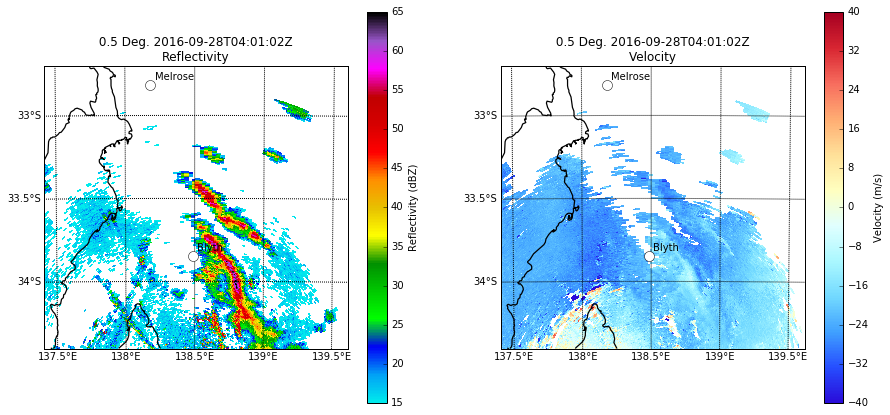

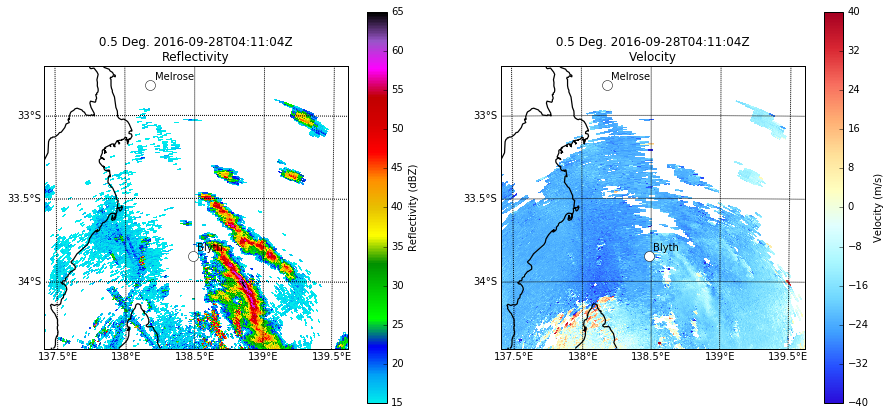

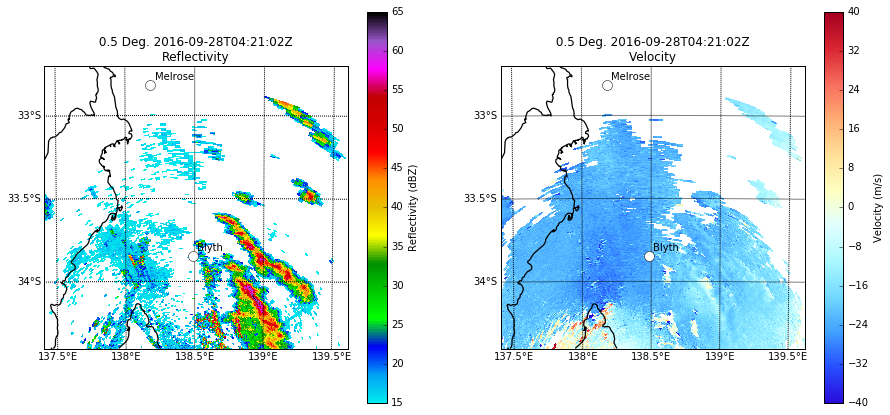

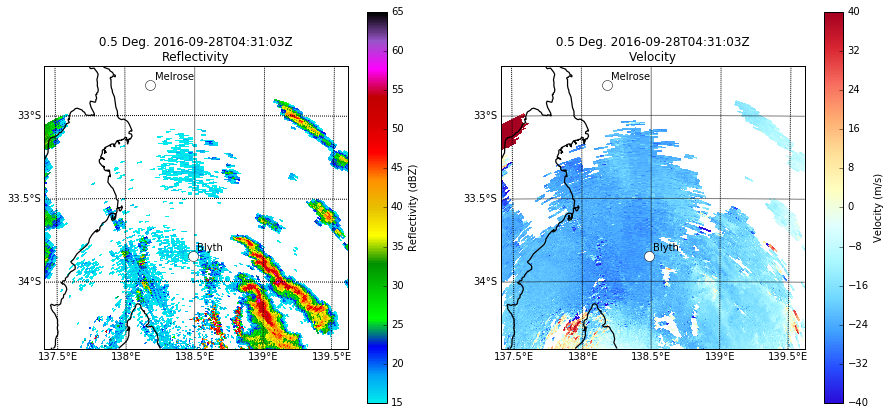

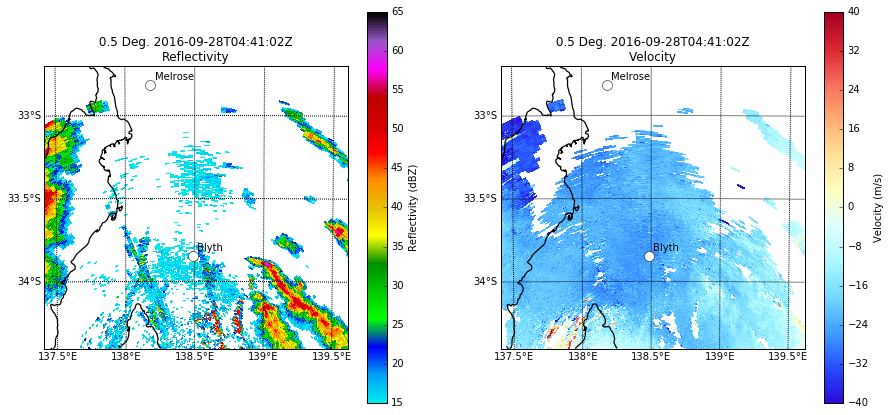

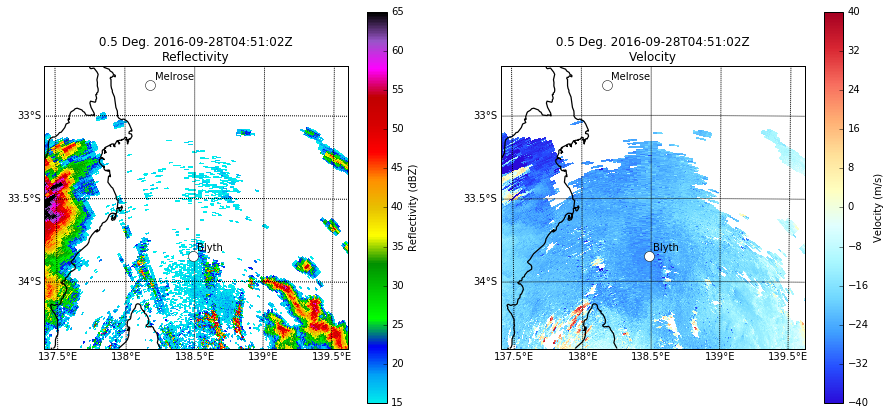

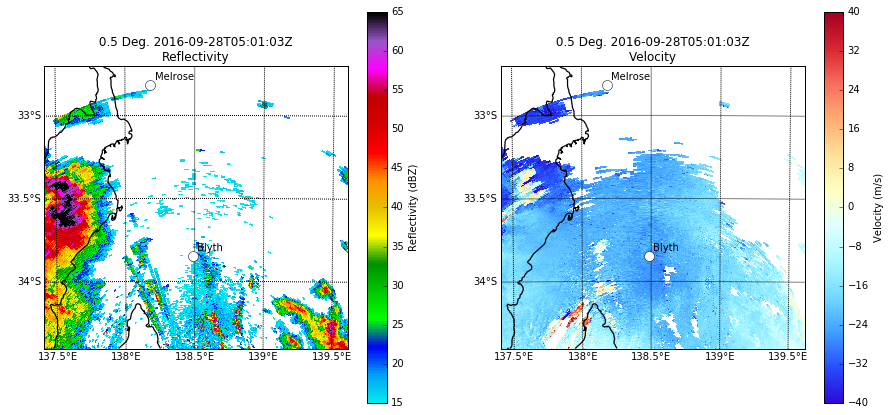

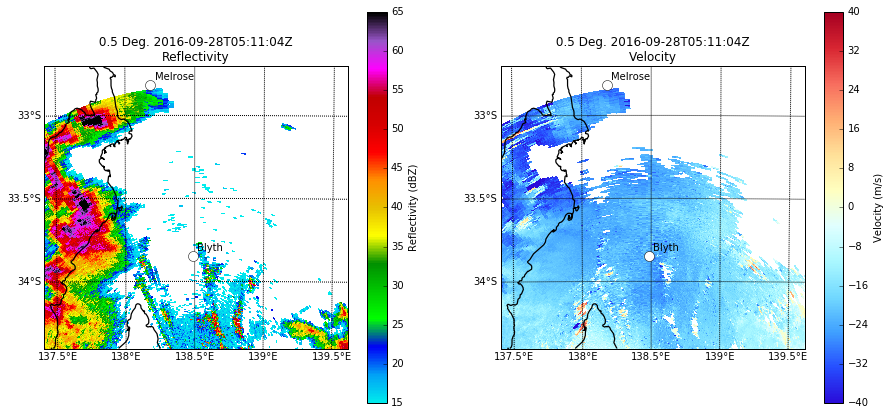

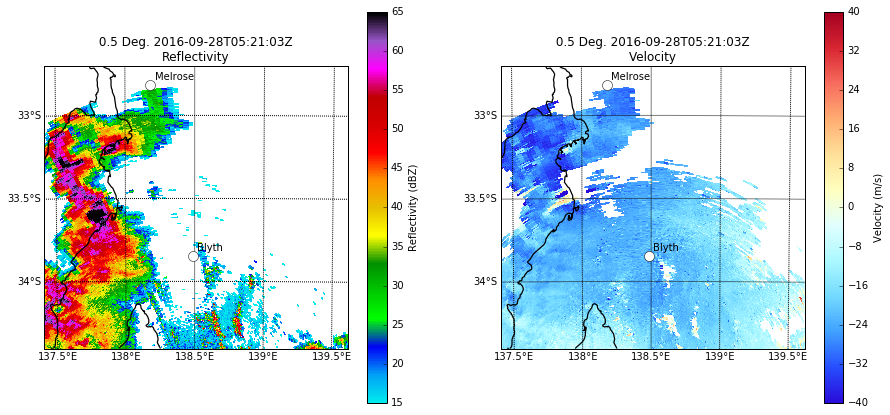

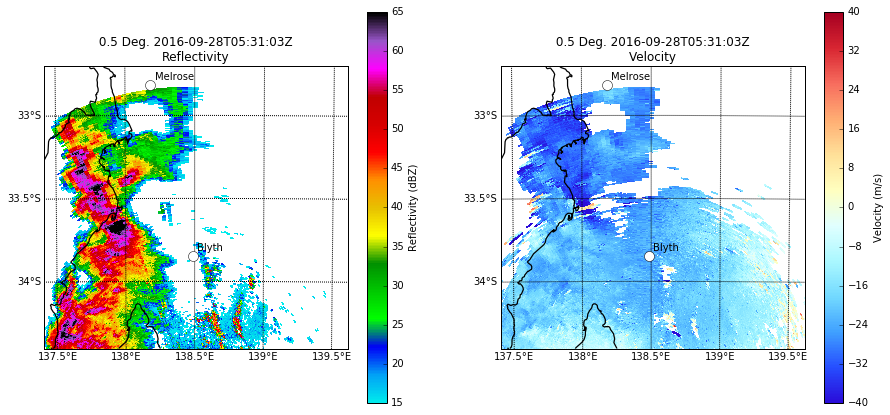

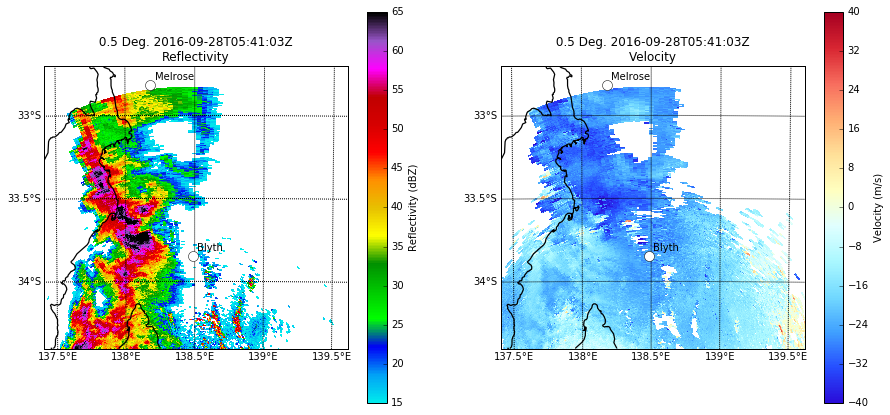

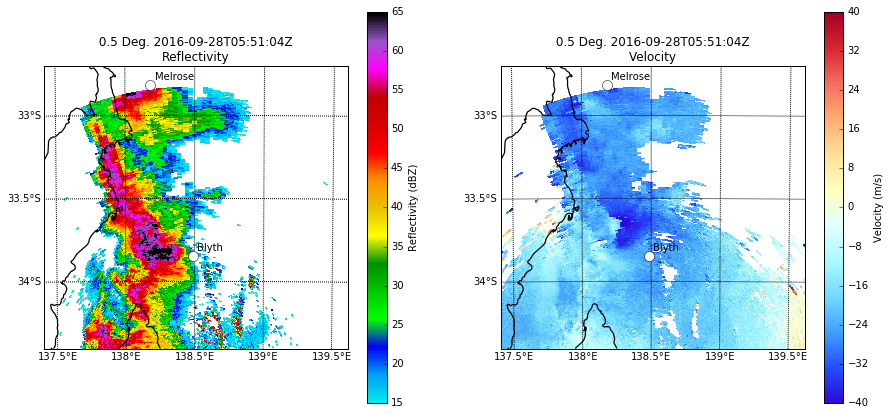

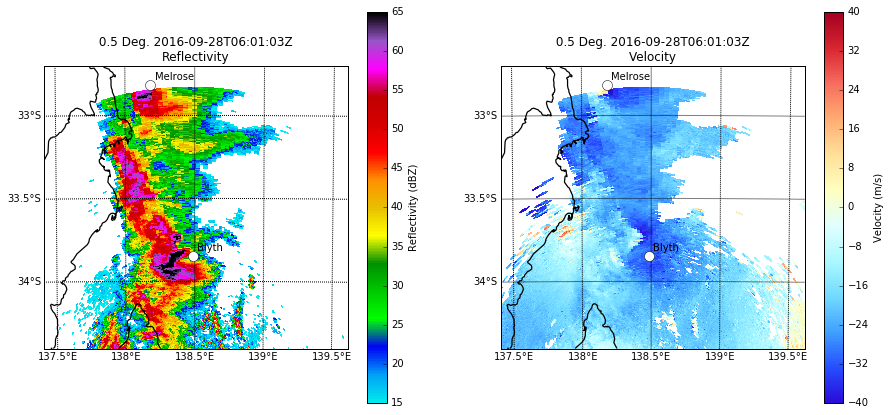

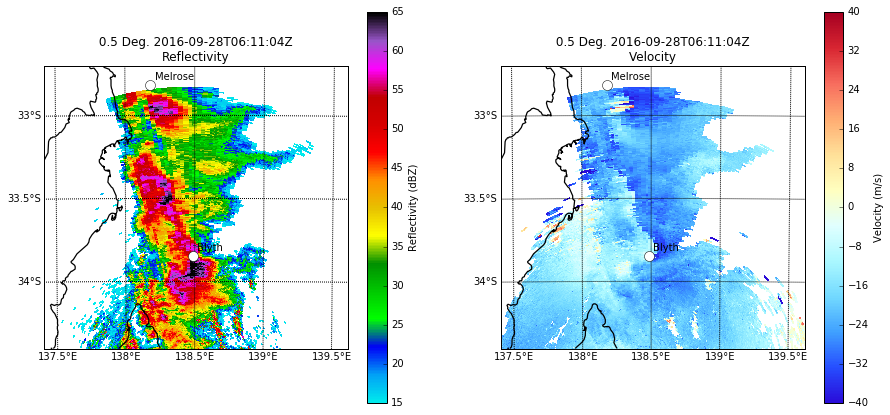

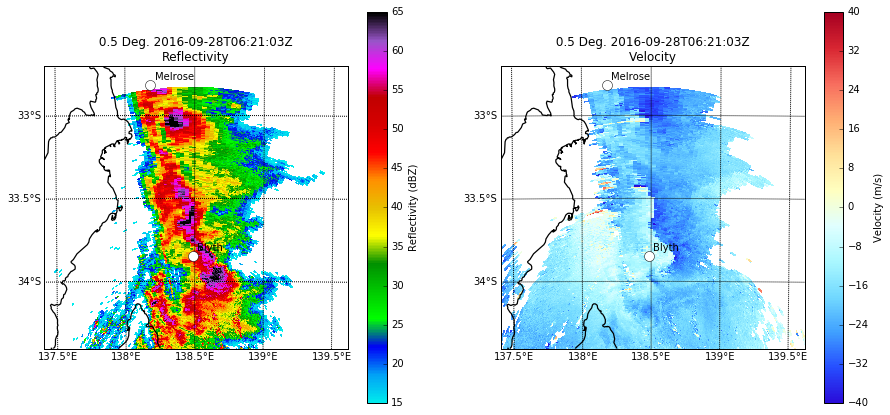

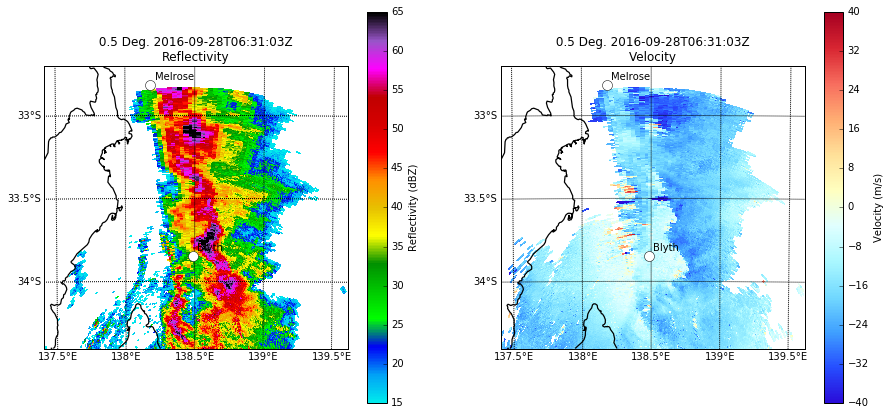

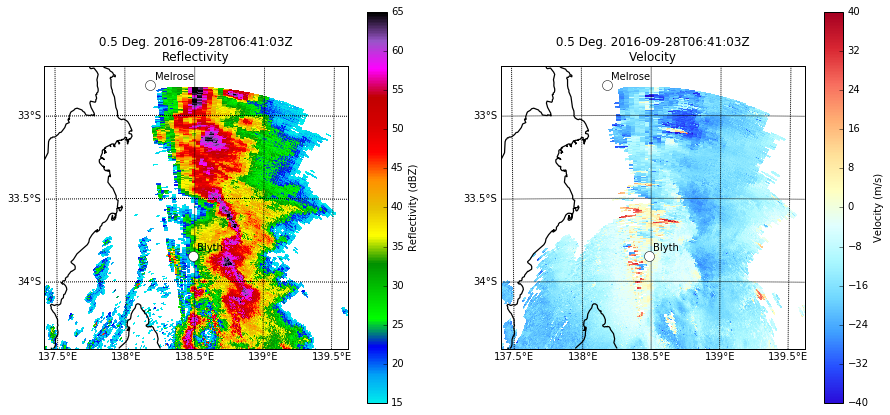

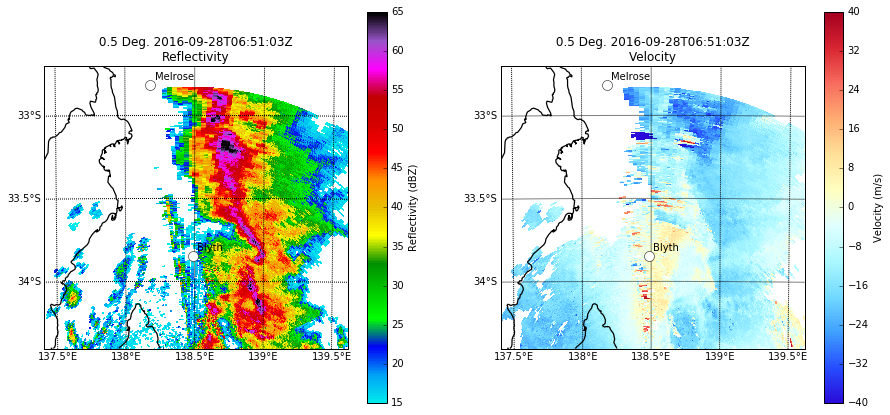

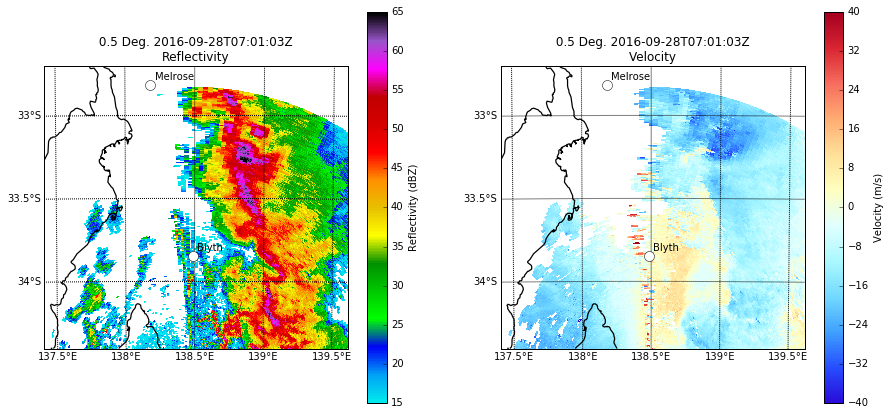

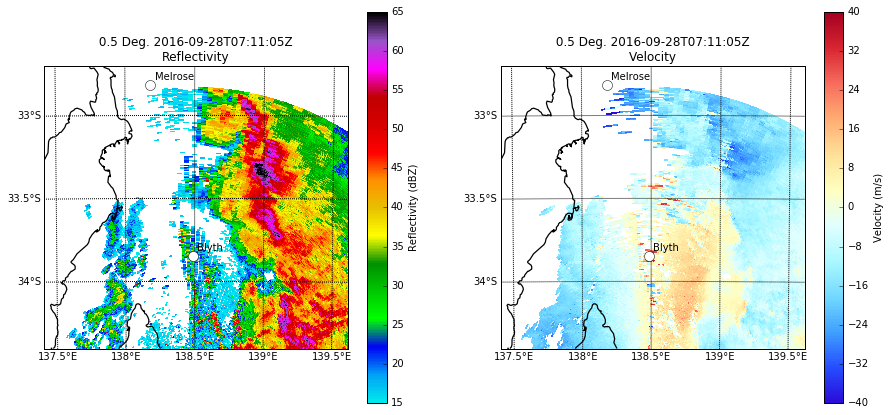

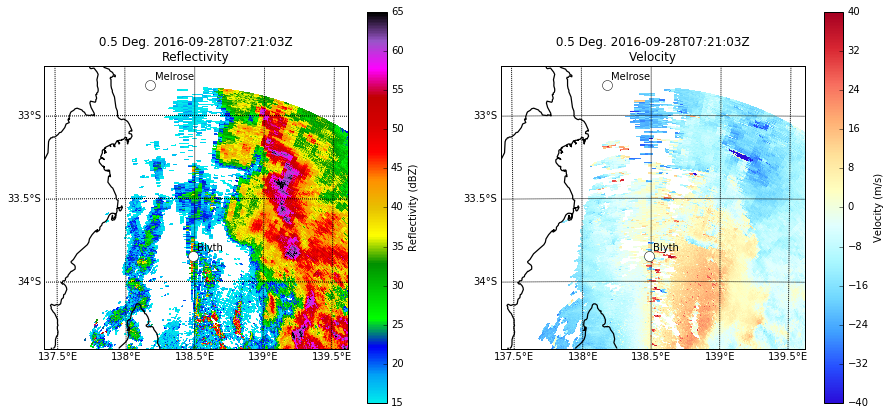

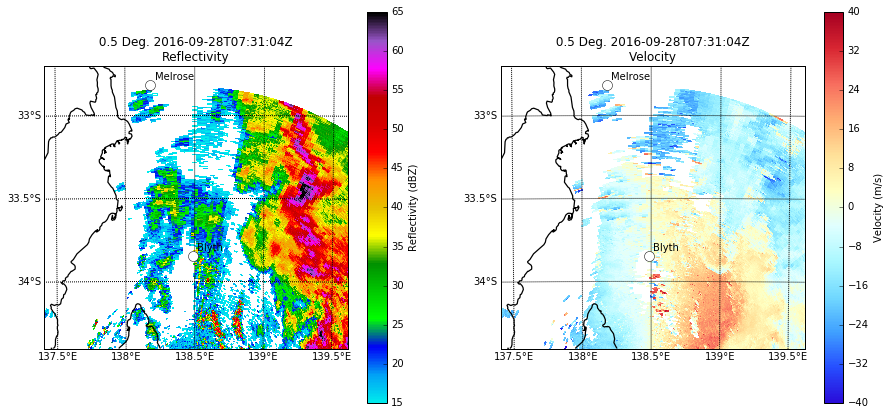

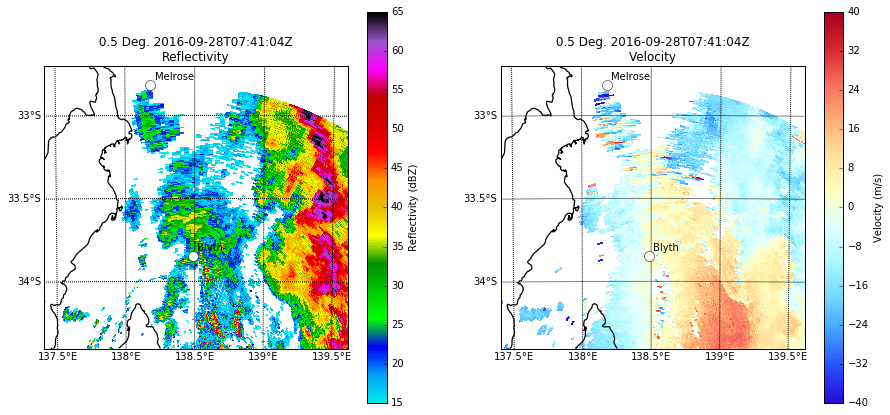

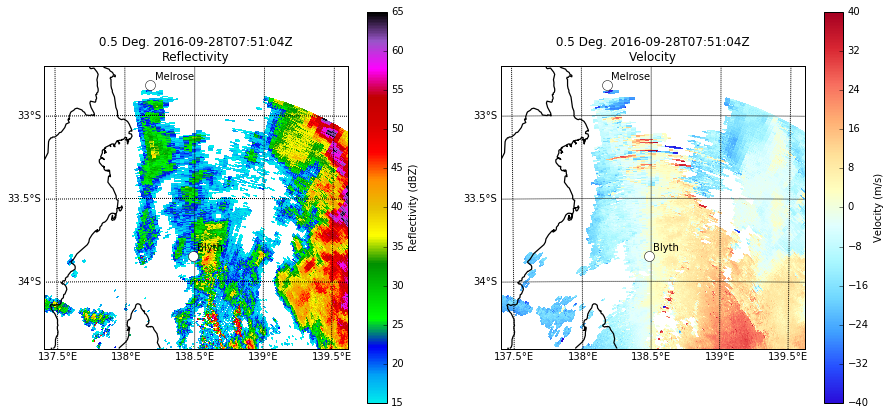

In [113]:
in_dir  = '/run/media/meso/DATA/project_data/sa_tor/'
out_dir = 'tmp/sa_tor/'
fls = os.listdir(in_dir)
fls.sort()
i = 0
for fl in fls:
    print('processing ', in_dir+ fl)
    plot_panel(in_dir+ fl,out_dir+fl+'.png')    
